In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import MaxNLocator

file = './logs/linpack_4_64_3_1_0__4000_1_8000_1_10000_1_80000000_1_4.csv'
# file = './logs/coremark_4_64_3_1_0__4000_1_8000_1_10000_1_80000000_1_4.csv'
# file = './logs/dhrystone_4_64_3_1_0__4000_1_8000_1_10000_1_80000000_1_4.csv'
# file = './logs/fibonacci_4_64_3_1_0__4000_1_8000_1_10000_1_80000000_1_4.csv'

data = pd.read_csv(file, delimiter=';')

data = data.apply(pd.to_numeric, errors='ignore')

columns_to_sum = ['L1_HIT', 'L2_HIT', 'L3_HIT', 'L3_MISS', 'L1_WB', 'L2_WB', 'L3_WB', 'L1_SWAP', 'L2_SWAP', 'L3_SWAP']

window_size = 10000
rolling_sums = data[columns_to_sum].rolling(window=window_size).sum()

reduced_rolling_sums = rolling_sums[::1000].copy()
reduced_rolling_sums['Trace_No'] = data['Trace_No'][::1000].values
reduced_rolling_sums['Programm_No'] = data['Programm_No'][::1000].values

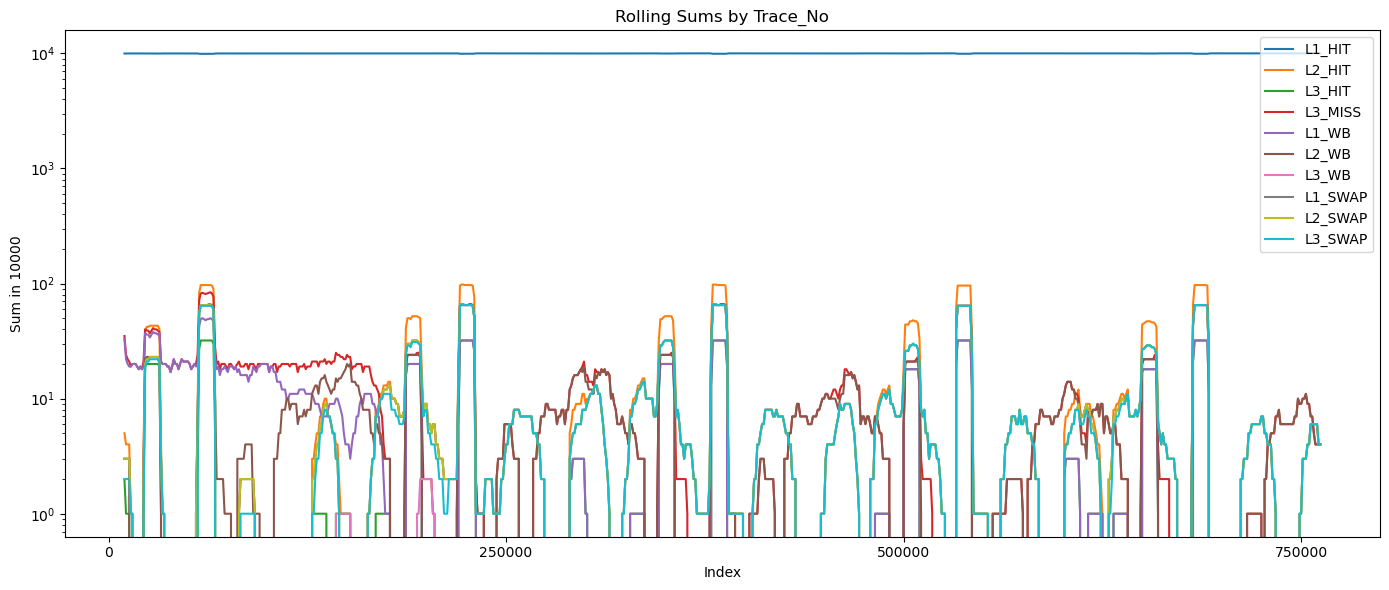

In [24]:
fig, axs = plt.subplots(figsize=(14, 6), sharex=True)

for col in columns_to_sum:
    axs.plot(reduced_rolling_sums['Trace_No'], reduced_rolling_sums[col], label=col)
axs.set_ylabel('Sum in 10000')
axs.set_yscale('log')
axs.legend(loc='upper right')
axs.set_title('Rolling Sums by Trace_No')

axs.set_xlabel('Index')
axs.xaxis.set_major_locator(MaxNLocator(nbins=4))

plt.tight_layout()
plt.show()

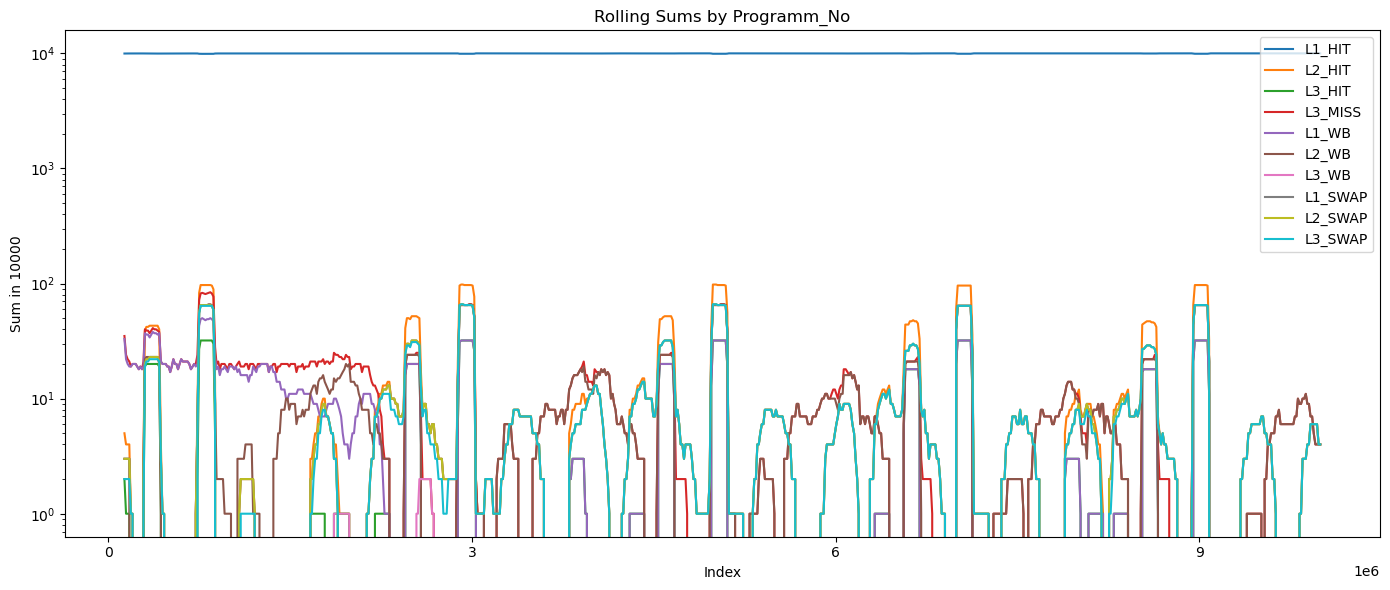

In [25]:
fig, axs = plt.subplots(figsize=(14, 6), sharex=True)

for col in columns_to_sum:
    axs.plot(reduced_rolling_sums['Programm_No'], reduced_rolling_sums[col], label=col)
axs.set_ylabel('Sum in 10000')
axs.set_yscale('log')
axs.legend(loc='upper right')
axs.set_title('Rolling Sums by Programm_No')

axs.set_xlabel('Index')
axs.xaxis.set_major_locator(MaxNLocator(nbins=4))

plt.tight_layout()
plt.show()